In [1]:
import numpy as np
from numpy import pi, sqrt, exp, sin, cos
import scipy.optimize
from qutip import *
import matplotlib.pyplot as plt
from core.dm_parametrization import *

[[1.+0.j 2.+3.j]
 [2.-3.j 4.+0.j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.2786762  -0.16546241  0.05649008 -0.09473841]
 [-0.16546241  0.30368358 -0.05197053  0.00086599]
 [ 0.05649008 -0.05197053  0.11786216 -0.03054097]
 [-0.09473841  0.00086599 -0.03054097  0.29977806]]
0.9999999999999998 True


/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  V[0:j - 1, 0:j - 1] = W
/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  V[0:j - 1, j - 1] = s * z_u.trans()
/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  V[j - 1, 0:j - 1] = -s * z_u.conj().trans()


In [15]:
D = np.array([1, -1, 7, -7]) * pi / 12
D = np.diag(D)
D = Qobj(D, dims=[[2, 2], [2, 2]])

V = [[sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(1j * pi / 4),
      sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(-1j * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(1j * 3 * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(-1j * 3 * pi / 4)],
     [sqrt(1 / (6 + 2 * sqrt(3))) * exp(1j * pi / 2),
      sqrt(1 / (6 + 2 * sqrt(3))) * exp(-1j * pi / 2),
      sqrt(1 / (6 - 2 * sqrt(3))) * exp(-1j * pi / 2),
      sqrt(1 / (6 - 2 * sqrt(3))) * exp(1j * pi / 2)],
     [sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(1j * 3 * pi / 4),
      sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(-1j * 3 * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(1j * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(-1j * pi / 4)],
     [sqrt(1 / (6 + 2 * sqrt(3))), sqrt(1 / (6 + 2 * sqrt(3))),
      sqrt(1 / (6 - 2 * sqrt(3))), sqrt(1 / (6 - 2 * sqrt(3)))]]
V = Qobj(V, dims=[[2, 2], [2, 2]])


def U(t):
    return V * (1j * D * t).expm() * V.dag()

def mutual_information(rho):
    return entropy_mutual(rho, 0, 1, base=2)

plot_data = {}

In [16]:
# def meas(rho, theta, phi):
#     psi = cos(theta)*basis(2,0) + exp(1j*phi)*sin(theta)*basis(2,1)
#     
#     p0 = tensor(psi*psi.dag(), identity(2))
#     p1 = 1 - p0
#     
#     return p0*rho*p0 + p1*rho*p1
# 
# def mutual_inf_c(theta, phi, t):
#     psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
#     rho_ab = ket2dm(psi_0)
#     U_t = U(t)
#     rho_cd = U_t.dag() * rho_ab * U_t
#     
#     rho_cd = meas(rho_cd, theta, phi)
#     
#     rho_ab = U_t* rho_cd * U_t.dag() 
#     
#     return entropy_mutual(rho_ab, 0, 1, base=2)
# 
# 
# bounds = [(0, np.pi), (0, 2*np.pi)]
# 
# def max_mutual_c(t):
#     f = lambda x: -mutual_inf_c(x[0], x[1], t)
#     return -scipy.optimize.minimize(f, x0=(0.5,0.5), bounds=bounds).fun
# 
# def max_mutual_c_glob(t):
#     f = lambda x: -mutual_inf_c(x[0], x[1], t)
#     return -scipy.optimize.shgo(f, bounds=bounds, iters=5).fun
# 
# # Plot
# 
# t_arr = np.linspace(0, 1, 40)
# I_max = np.zeros_like(t_arr)
# for i, t in enumerate(t_arr):
#     I_max[i] = max_mutual_c(t)

# print(I_max)

# plt.plot(t_arr, I_max)

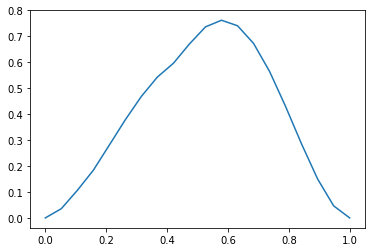

In [3]:
def meas_herm(rho, a, b, r, theta):
    M = np.zeros((2,2), dtype=complex)
    M[0,0] = a
    M[1,1] = b
    M[0,1] = r*exp(1j*theta)
    M[1,0] = np.conj(M[0,1])
    M = Qobj(M)
    eval, evec = M.eigenstates()
    
    p0 = evec[0]*evec[0].dag()
    p1 = evec[1]*evec[1].dag()
    p0 = tensor(p0, identity(2))
    p1 = tensor(p1, identity(2))
    
    return p0*rho*p0 + p1*rho*p1
    
def mutual_inf_c(a, b, r, theta, t):
    psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
    rho_ab = ket2dm(psi_0)
    U_t = U(t)
    rho_cd = U_t.dag() * rho_ab * U_t
    
    rho_cd = meas_herm(rho_cd, a, b, r, theta)
    
    rho_ab = U_t * rho_cd * U_t.dag()
    
    return entropy_mutual(rho_ab, 0, 1, base=2)


def max_mutual_c(t):
    f = lambda x: -mutual_inf_c(*x, t)
    return -scipy.optimize.minimize(f, x0=(4,3,2,1)).fun

# Plot
t_arr = np.linspace(0, 1, 20)
I_max_meas_herm = np.zeros_like(t_arr)
for i, t in enumerate(t_arr):
    I_max_meas_herm[i] = max_mutual_c(t)

plt.plot(t_arr, I_max_meas_herm)
plot_data['meas']=(t_arr, I_max_meas_herm)

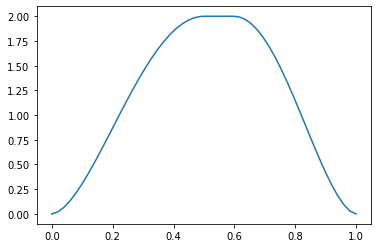

In [16]:
def U_C(phi1, phi2, theta):
    X = [[exp(1j * phi1) * cos(theta), exp(1j * phi2) * sin(theta)],
         [-exp(-1j * phi2) * sin(theta), exp(-1j * phi1) * cos(theta)]]
    return Qobj(X)

def mutual_inf_c(ph1, ph2, theta, t):
    psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
    rho_ab = ket2dm(psi_0)
    U_t = U(t)
    rho_cd = U_t.dag() * rho_ab * U_t
    
    UC = tensor(U_C(ph1, ph2, theta),identity(2))
    rho_cd = UC * rho_cd * UC.dag()

    rho_ab = U_t* rho_cd * U_t.dag() 
    
    return entropy_mutual(rho_ab, 0, 1, base=2)

def max_mutual_c(t):
    f = lambda x: -mutual_inf_c(*x, t)
    return -scipy.optimize.minimize(f, x0=(0.0,0.5,0.5)).fun

t_arr = np.linspace(0, 1, 50)
I_max_unit = np.zeros_like(t_arr)
for i, t in enumerate(t_arr):
    I_max_unit[i] = max_mutual_c(t)

plt.plot(t_arr, I_max_unit)
plot_data['unit']=(t_arr, I_max_unit)

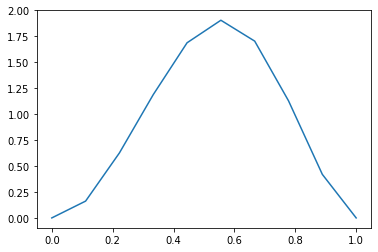

In [5]:
def U_C(phi1, phi2, theta):
    X = [[exp(1j * phi1) * cos(theta), exp(1j * phi2) * sin(theta)],
         [-exp(-1j * phi2) * sin(theta), exp(-1j * phi1) * cos(theta)]]
    return Qobj(X)

def meas_herm(rho, a, b, r, theta):
    M = np.zeros((2,2), dtype=complex)
    M[0,0] = a
    M[1,1] = b
    M[0,1] = r*exp(1j*theta)
    M[1,0] = np.conj(M[0,1])
    M = Qobj(M)
    eval, evec = M.eigenstates()
    
    p0 = evec[0]*evec[0].dag()
    p1 = evec[1]*evec[1].dag()
    p0 = tensor(p0, identity(2))
    p1 = tensor(p1, identity(2))
    
    return p0*rho*p0 + p1*rho*p1

def mutual_inf_c(ph1, ph2, theta, a, b, r, alpha, t):
    psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
    rho_ab = ket2dm(psi_0)
    U_t = U(t)
    rho_cd = U_t.dag() * rho_ab * U_t
    
    UC = tensor(U_C(ph1, ph2, theta),identity(2))
    rho_cd = UC * rho_cd * UC.dag()
    rho_cd = meas_herm(rho_cd, a, b, r, alpha)
    
    rho_ab = U_t * rho_cd * U_t.dag()
    
    return entropy_mutual(rho_ab, 0, 1, base=2)

def max_mutual_c(t):
    f = lambda x: -mutual_inf_c(*x, t)
    return -scipy.optimize.minimize(f, x0=(0.5,0.5,0.5,1,4,3,7)).fun

t_arr = np.linspace(0, 1, 10)
I_max_unit_meas = np.zeros_like(t_arr)
for i, t in enumerate(t_arr):
    I_max_unit_meas[i] = max_mutual_c(t)

plt.plot(t_arr, I_max_unit_meas)
plot_data['meas']=(t_arr, I_max_unit_meas)

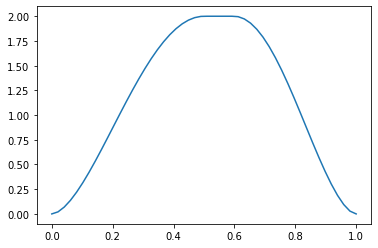

In [17]:
def tpcp(rho_cd, x):
    U_EC = get_unitary(x[0:16], n=4)
    U_EC = Qobj(U_EC, dims=[[2,2],[2,2]])
    U_ECD = tensor(U_EC, identity(2))
    
    # rho_E0 = get_dm(z_arr=[[],[x[16]],[x[17],x[18]]], eig_vals=(x[19],x[20]), n=2)
    rho_E0 = get_qubit_dm(*x[16:19])
    rho_ecd = tensor(rho_E0, rho_cd)
    
    rho_ecd = U_ECD * rho_ecd * U_ECD.dag()
    rho_cd = rho_ecd.ptrace([1, 2])
    
    return rho_cd

def mutual_information(rho):
    return entropy_mutual(rho, 0, 1, base=2)

def mutual_inf_c(x, t):
    psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
    rho_ab = ket2dm(psi_0)
    U_t = U(t)
    
    rho_cd = U_t.dag() * rho_ab * U_t
    rho_cd = tpcp(rho_cd, x)
    rho_ab = U_t * rho_cd * U_t.dag()
    
    return entropy_mutual(rho_ab, 0, 1, base=2)


bounds = [(None, None)]*19
bounds[16] = (0, 1)
bounds[17] = (0, pi)
bounds[18] = (0, 2*pi)

def max_mutual_c(t):
    f = lambda x, t: -mutual_inf_c(x, t)
    return -scipy.optimize.minimize(f, np.ones(19), args=t, bounds=bounds).fun

# Plot
t_arr = np.linspace(0, 1, 50)
I_max_stine= np.zeros_like(t_arr)
for i, t in enumerate(t_arr):
    print((i, t))
    I_max_stine[i] = max_mutual_c(t)

plt.plot(t_arr, I_max_stine)
plot_data['TPCP']=(t_arr, I_max_stine)

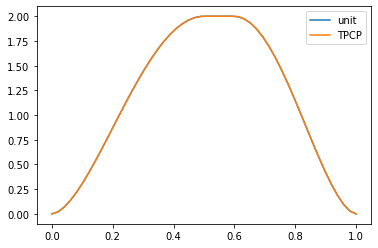

In [19]:
plt.figure()

for label, (t_arr, I_max) in plot_data.items():
    plt.plot(t_arr, I_max, label=label)
plt.legend()
